In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects

from scipy import stats

In [2]:
def get_t_score_from_p_value(p_val_ref,df):
    t_score = 1
    p_val = 2*(1 - stats.t.cdf(t_score,df=df))
    err = 0.0000001
    factor = 10

    while abs(p_val - p_val_ref) > err:
        t_score = t_score + (p_val - p_val_ref)*factor
        p_val = 2*(1 - stats.t.cdf(t_score,df=df))
        
    return t_score

# MQ2008

In [3]:
folds = ["fold1","fold2","fold3","fold4","fold5"]

measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

datasets = ["train","vali","test"]

In [4]:
dataset_path = "../../MQ2008/min.txt"
with open(dataset_path) as f:
   n = sum(1 for _ in f)

n_samples_datasets = [int(0.6*n),int(0.2*n),int(0.2*n)]

### NDCG measures for the top models of the LTR4L ListNet implementation

In [5]:
ltr4l_path = "../../MQ2008/results_summary/Results_ltr4l_global_vali.csv"
ltr4l_df = pd.read_csv(ltr4l_path)

ltr4l_df = ltr4l_df.sort_values(['NDCG_Mean'],ascending=False)
ltr4l_top_model_id = ltr4l_df.index[0]

In [6]:
#TOP 5 MODELS OF OUR PERSONAL LISTNET IMPLEMENTATION
ltr4l_df.head(5)

,epochs,learning_rate,momentum,output function,hidden function,nb hidden layers,nb neurons,P@1,P@2,P@3,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
2,100,0.001,0.10,Identity,NaN,NaN,NaN,0.45874,0.41792,0.39240,...,0.43742,0.45888,0.47838,0.49170,0.49754,0.46064,0.22522,0.22950,0.407946,0.009188
0,100,0.001,0.01,Identity,NaN,NaN,NaN,0.45872,0.41772,0.39198,...,0.43720,0.45884,0.47826,0.49160,0.49744,0.46050,0.22498,0.22932,0.407856,0.009194
4,100,0.001,0.30,Identity,NaN,NaN,NaN,0.45832,0.41792,0.39212,...,0.43702,0.45876,0.47812,0.49146,0.49742,0.46056,0.22510,0.22936,0.407744,0.009185
14,500,0.001,0.10,Identity,NaN,NaN,NaN,0.45620,0.41772,0.39198,...,0.43674,0.45876,0.47796,0.49142,0.49752,0.46062,0.22536,0.22972,0.407578,0.009167
12,500,0.001,0.01,Identity,NaN,NaN,NaN,0.45620,0.41772,0.39198,...,0.43674,0.45876,0.47796,0.49142,0.49752,0.46062,0.22536,0.22970,0.407576,0.009167


In [7]:
ltr4l_df.iloc[0]["P_Mean"]

0.341772

In [8]:
columns = ["Fold" if x == 0 else ltr4l_df.columns[x-1] for x in range(len(ltr4l_df.columns)+1)]
best_df = pd.DataFrame(columns = columns)
index = 0
for fold in ["fold1","fold2","fold3","fold4","fold5","global"]:
    my_path = "../../MQ2008/results_summary/Results_ltr4l_"+fold+"_test.csv"
    temp_df = pd.read_csv(my_path)
    best_df.loc[index,0:1] = fold
    best_df.loc[index,1:] = (temp_df.loc[ltr4l_top_model_id])
    index += 1

In [9]:
best_df

,Fold,epochs,learning_rate,momentum,output function,hidden function,nb hidden layers,nb neurons,P@1,P@2,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,fold1,100,0.001,0.1,Identity,NaN,NaN,NaN,0.4359,0.4006,...,0.4135,0.438,0.4584,0.4689,0.4818,0.4309,0.2141,0.2157,0.38847,0.00853585
1,fold2,100,0.001,0.1,Identity,NaN,NaN,NaN,0.3885,0.3662,...,0.3812,0.4038,0.4222,0.4347,0.4401,0.4201,0.1684,0.1737,0.35056,0.00951286
2,fold3,100,0.001,0.1,Identity,NaN,NaN,NaN,0.4204,0.379,...,0.3954,0.4298,0.4503,0.4671,0.4689,0.4519,0.2421,0.2509,0.39059,0.00631178
3,fold4,100,0.001,0.1,Identity,NaN,NaN,NaN,0.4904,0.4777,...,0.4975,0.5182,0.5323,0.5392,0.5462,0.4963,0.2855,0.2904,0.45649,0.0088107
4,fold5,100,0.001,0.1,Identity,NaN,NaN,NaN,0.4713,0.4236,...,0.466,0.4801,0.5073,0.5244,0.5286,0.4943,0.2106,0.2179,0.42451,0.0126938
5,global,100,0.001,0.1,Identity,NaN,NaN,NaN,0.4413,0.40942,...,0.43072,0.45398,0.4741,0.48686,0.49312,0.4587,0.22414,0.22972,0.402124,0.00899574


### NDCG measures for the ListNet baselines of MQ2008

In [11]:
baseline_path = "../../MQ2008/results_summary/Results_baseline_test.csv"
baseline_df = pd.read_csv(baseline_path)

In [12]:
baseline_df

,Folds,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,Fold1,0.4038,0.3910,0.3718,0.3574,0.3346,0.3077,0.2848,0.2644,0.2500,...,0.4215,0.4427,0.4565,0.4709,0.4818,0.4312,0.2086,0.2108,0.38697,0.009158
1,Fold2,0.4013,0.3599,0.3397,0.3232,0.3083,0.2909,0.2721,0.2516,0.2350,...,0.3855,0.4048,0.4266,0.4431,0.4451,0.4247,0.1687,0.1714,0.35471,0.009861
2,Fold3,0.4076,0.3790,0.3418,0.3328,0.3210,0.3015,0.2821,0.2619,0.2498,...,0.4031,0.4310,0.4519,0.4689,0.4712,0.4539,0.2509,0.2557,0.39435,0.006040
3,Fold4,0.5287,0.4841,0.4586,0.4331,0.4038,0.3800,0.3585,0.3360,0.3142,...,0.4823,0.5064,0.5257,0.5356,0.5478,0.4990,0.2853,0.2903,0.45726,0.008180
4,Fold5,0.4841,0.4459,0.4055,0.3790,0.3452,0.3217,0.3057,0.2818,0.2647,...,0.4696,0.4992,0.5128,0.5283,0.5431,0.5060,0.2188,0.2234,0.43542,0.012953
5,average,0.4451,0.4120,0.3835,0.3651,0.3426,0.3204,0.3006,0.2791,0.2627,...,0.4324,0.4568,0.4747,0.4894,0.4978,0.4630,0.2265,0.2303,0.40575,0.009068


In [13]:
baseline_df.iloc[5]["P_Mean"]

0.33587

### Comparison NDCG measures between top model of the baseline and LTR4L

In [14]:
ltr4l_mean = [[] for x in range(len(datasets))]
ltr4l_var = [[] for x in range(len(datasets))]

baseline_mean = [[] for x in range(len(datasets))]
baseline_var = [[] for x in range(len(datasets))]

for idx_dataset in range(len(datasets)):
    ltr4l_list_NDCG = [[] for x in range(len(measures_names))]
    baseline_list_NDCG = [[] for x in range(len(measures_names))]
    
    baseline_path = "../../MQ2008/results_summary/Results_baseline_"+datasets[idx_dataset]+".csv"
    
    baseline_df = pd.read_csv(baseline_path)
    
    for idx_fold in range(len(folds)):
        
        ltr4l_path = "../../MQ2008/results_summary/Results_ltr4l_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        ltr4l_df = pd.read_csv(ltr4l_path)
        
        for idx_metric in range(len(measures_names)):
            ltr4l_list_NDCG[idx_metric].append(ltr4l_df.iloc[ltr4l_top_model_id][measures_names[idx_metric]])
            baseline_list_NDCG[idx_metric].append(baseline_df.iloc[idx_fold][measures_names[idx_metric]])
            
    ltr4l_mean[idx_dataset] = np.array(ltr4l_list_NDCG).mean(axis=1)
    ltr4l_var[idx_dataset] = np.array(ltr4l_list_NDCG).var(axis=1)
    
    baseline_mean[idx_dataset] = np.array(baseline_list_NDCG).mean(axis=1)
    baseline_var[idx_dataset] = np.array(baseline_list_NDCG).var(axis=1)

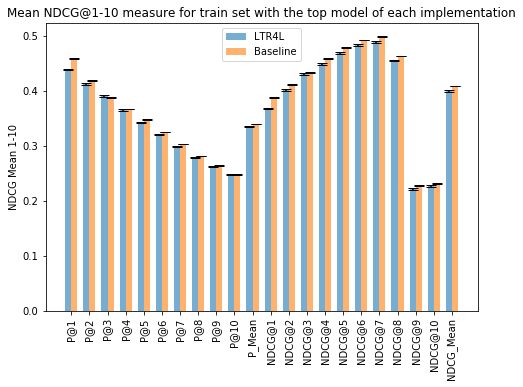

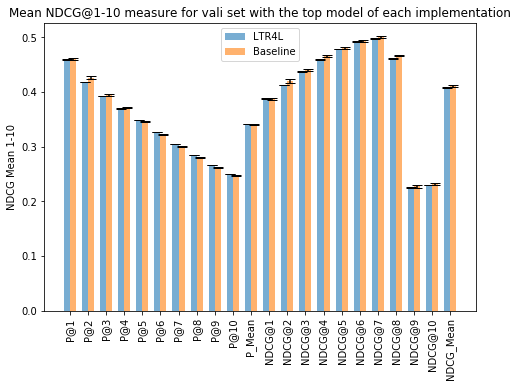

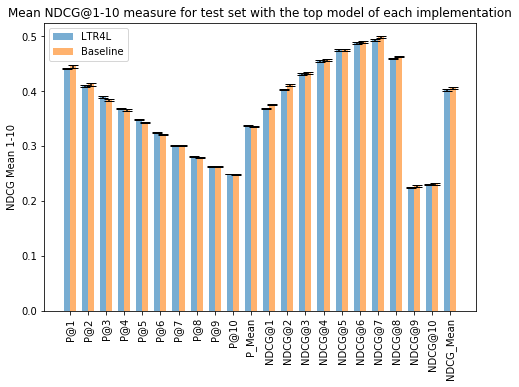

In [15]:
indices = range(len(measures_names))
width = np.min(np.diff(indices))/3.

for idx_dataset in range(len(datasets)):
    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(indices-width/2, ltr4l_mean[idx_dataset],width, yerr = ltr4l_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "LTR4L")
    ax.bar(indices+width/2, baseline_mean[idx_dataset],width, yerr = baseline_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "Baseline")
    ax.set_title("Mean NDCG@1-10 measure for "+datasets[idx_dataset]+" set with the top model of each implementation")
    ax.set_xticks(indices)
    ax.axes.set_xticklabels(measures_names)
    ax.set_ylabel("NDCG Mean 1-10")
    ax.legend(loc='best')

### Comparing NDCG of the top model of each library with Wilcoxon's signed-rank test

We will now compare the results by the two bests models of our libraries with the Wilcoxon's signed-rank test
- We take the best model of each library
- We study how they perform on each folder
- We will compare their NDCG values and use them for the Wilcoxon's signed-rank test

In [16]:
measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

w_score = [[] for x in range(len(datasets))]
p_value = [[] for x in range(len(datasets))]

sig_lvl = 0.05

In [17]:
n = len(folds)

for idx_dataset in range(len(datasets)):
    diff = [[] for x in range(len(measures_names))]
    
    baseline_path = "../../MQ2008/results_summary/Results_baseline_"+datasets[idx_dataset]+".csv"
    
    baseline_df = pd.read_csv(baseline_path)
    
    for idx_fold in range(len(folds)):
        
        ltr4l_path = "../../MQ2008/results_summary/Results_ltr4l_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        ltr4l_df = pd.read_csv(ltr4l_path)
        
        for idx_metric in range(len(measures_names)):
            ltr4l_NDCG = ltr4l_df.iloc[ltr4l_top_model_id][measures_names[idx_metric]]
            baseline_NDCG = baseline_df.iloc[idx_fold][measures_names[idx_metric]]
            diff[idx_metric].append(ltr4l_NDCG - baseline_NDCG)
            
    for idx_metric in range(len(measures_names)):        
        w,p= stats.wilcoxon(diff[idx_metric])
        w_score[idx_dataset].append(w)
        p_value[idx_dataset].append(p)

/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


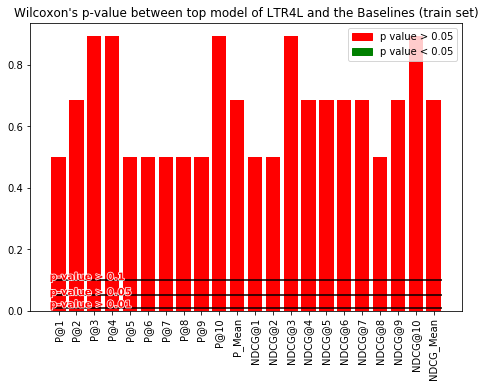

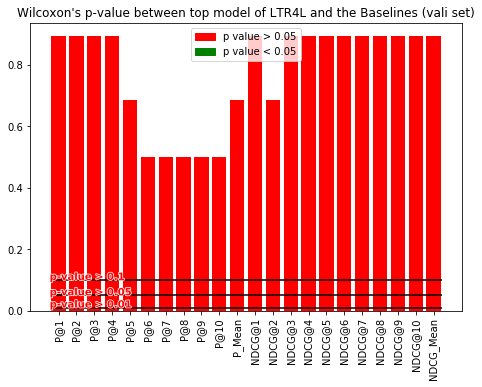

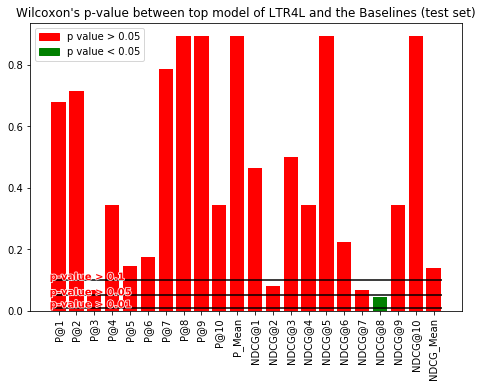

In [18]:
red_patch = mpatches.Patch(color='red', label='p value > '+str(sig_lvl))
green_patch = mpatches.Patch(color='green', label='p value < '+str(sig_lvl))
for idx_dataset in range(len(datasets)):
    colors = []
    for idx_metric in range(len(measures_names)):
        if p_value[idx_dataset][idx_metric] < sig_lvl:
            colors.append("green")
        else:
            colors.append("red")

    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(measures_names,p_value[idx_dataset],color=colors)
    ax.set_title("Wilcoxon's p-value between top model of LTR4L and the Baselines ("+datasets[idx_dataset]+" set)")
    ax.legend(handles=[red_patch,green_patch])
    if any(p > 0.1 for p in p_value[idx_dataset]):
        ax.hlines(0.1,-0.5,len(measures_names)-0.5, label="p_value > 0.1")
        txt = ax.text(-0.5, 0.1, s="p-value > 0.1", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.05 for p in p_value[idx_dataset]):
        ax.hlines(0.05,-0.5,len(measures_names)-0.5, label="p_value > 0.05")
        txt=ax.text(-0.5, 0.05, s="p-value > 0.05", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.01 for p in p_value[idx_dataset]):
        ax.hlines(0.01,-0.5,len(measures_names)-0.5, label="p_value > 0.01")
        txt=ax.text(-0.5, 0.01, s="p-value > 0.01", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])

In [19]:
w_score_df = pd.DataFrame(w_score, columns = measures_names, index=datasets)
w_score_df.style.set_caption("W score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,5,6,7,7,5,5,5,5,5,7,6,5,5,7,6,6,6,6,5,6,7,6
vali,7,7,7,7,6,5,5,5,5,5,6,7,6,7,7,7,7,7,7,7,7,7
test,6,4,0,4,1,2.5,6.5,7,7,4,7,3,1,5,4,7,3,0,0,4,7,2


In [20]:
p_value_df = pd.DataFrame(p_value, columns = measures_names, index=datasets)
p_value_df.style.set_caption("P-value score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0.500184,0.68583,0.892738,0.892738,0.500184,0.500184,0.500184,0.500184,0.500184,0.892738,0.68583,0.500184,0.500184,0.892738,0.68583,0.68583,0.68583,0.68583,0.500184,0.68583,0.892738,0.68583
vali,0.892738,0.892738,0.892738,0.892738,0.68583,0.500184,0.500184,0.500184,0.500184,0.500184,0.68583,0.892738,0.68583,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738
test,0.68028,0.715001,0.0678892,0.343028,0.144127,0.175554,0.786457,0.892738,0.892738,0.345231,0.892738,0.465209,0.0796158,0.500184,0.345231,0.892738,0.224916,0.0678892,0.0431144,0.345231,0.892738,0.138011


# MQ2007

In [21]:
folds = ["fold1","fold2","fold3","fold4","fold5"]

measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

datasets = ["train","vali","test"]

In [22]:
dataset_path = "../../MQ2007/min.txt"
with open(dataset_path) as f:
   n = sum(1 for _ in f)

n_samples_datasets = [int(0.6*n),int(0.2*n),int(0.2*n)]

### NDCG measures for the top models of our LTR4L ListNet implementation

In [23]:
ltr4l_path = "../../MQ2007/results_summary/Results_ltr4l_global_vali.csv"
ltr4l_df = pd.read_csv(ltr4l_path)

ltr4l_df = ltr4l_df.sort_values(['NDCG_Mean'],ascending=False)
ltr4l_top_model_id = ltr4l_df.index[0]

In [24]:
#TOP 5 MODELS OF OUR PERSONAL LISTNET IMPLEMENTATION
ltr4l_df.head(5)

,epochs,learning_rate,momentum,output function,hidden function,nb hidden layers,nb neurons,P@1,P@2,P@3,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
16,500,0.001,0.30,Identity,NaN,NaN,NaN,0.47638,0.45302,0.44010,...,0.41444,0.41854,0.42342,0.42778,0.43196,0.43704,0.44232,0.44710,0.425894,0.000170
12,500,0.001,0.01,Identity,NaN,NaN,NaN,0.47638,0.45302,0.44004,...,0.41440,0.41852,0.42342,0.42774,0.43196,0.43702,0.44232,0.44710,0.425882,0.000170
4,100,0.001,0.30,Identity,NaN,NaN,NaN,0.47578,0.45292,0.44000,...,0.41440,0.41842,0.42360,0.42788,0.43204,0.43700,0.44212,0.44696,0.425882,0.000169
14,500,0.001,0.10,Identity,NaN,NaN,NaN,0.47638,0.45302,0.44004,...,0.41440,0.41852,0.42342,0.42774,0.43196,0.43702,0.44232,0.44710,0.425882,0.000170
0,100,0.001,0.01,Identity,NaN,NaN,NaN,0.47618,0.45282,0.43990,...,0.41432,0.41842,0.42354,0.42790,0.43196,0.43694,0.44206,0.44692,0.425860,0.000168


In [25]:
ltr4l_df.iloc[0]["P_Mean"]

0.419642

In [26]:
ltr4l_path = "../../MQ2007/results_summary/Results_ltr4l_global_test.csv"
ltr4l_df = pd.read_csv(ltr4l_path)
ltr4l_df.iloc[ltr4l_top_model_id]

epochs                      500
learning_rate             0.001
momentum                    0.3
output function        Identity
hidden function             NaN
nb hidden layers            NaN
nb neurons                  NaN
P@1                     0.47224
P@2                     0.45222
P@3                      0.4321
P@4                     0.41966
P@5                     0.41094
P@6                      0.4032
P@7                      0.3962
P@8                     0.39046
P@9                      0.3861
P@10                    0.38084
P_Mean                 0.414396
P_Var               0.000808571
NDCG@1                  0.40452
NDCG@2                  0.40712
NDCG@3                  0.40696
NDCG@4                  0.41016
NDCG@5                  0.41346
NDCG@6                  0.41866
NDCG@7                  0.42382
NDCG@8                  0.43026
NDCG@9                  0.43652
NDCG@10                 0.44206
NDCG_Mean              0.419354
NDCG_Var             0.00015922
Name: 16

### NDCG measures for the ListNet baselines of MQ2007

In [27]:
baseline_path = "../../MQ2007/results_summary/Results_baseline_vali.csv"
baseline_df = pd.read_csv(baseline_path)

In [28]:
baseline_df

,Folds,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,Fold1,0.4749,0.4646,0.4484,0.4270,0.4124,0.4036,0.3953,0.3872,0.3818,...,0.4273,0.4276,0.4271,0.4326,0.4379,0.4431,0.4482,0.4550,0.43351,0.000141
1,Fold2,0.4851,0.4777,0.4633,0.4509,0.4381,0.4330,0.4226,0.4141,0.4067,...,0.4474,0.4492,0.4531,0.4627,0.4680,0.4720,0.4753,0.4804,0.45875,0.000207
2,Fold3,0.4720,0.4528,0.4376,0.4292,0.4165,0.4090,0.4029,0.3986,0.3933,...,0.3961,0.3985,0.4024,0.4069,0.4131,0.4176,0.4231,0.4284,0.40654,0.000175
3,Fold4,0.4985,0.4617,0.4376,0.4189,0.4136,0.4007,0.3881,0.3824,0.3746,...,0.4227,0.4242,0.4319,0.4359,0.4348,0.4406,0.4440,0.4497,0.43425,0.000074
4,Fold5,0.4543,0.4277,0.4041,0.4004,0.3935,0.3815,0.3793,0.3709,0.3687,...,0.3677,0.3778,0.3865,0.3900,0.4001,0.4050,0.4133,0.4204,0.39024,0.000319
5,average,0.4770,0.4569,0.4382,0.4253,0.4148,0.4056,0.3976,0.3906,0.3850,...,0.4122,0.4155,0.4202,0.4256,0.4308,0.4357,0.4408,0.4468,0.42467,0.000164


In [29]:
baseline_df.iloc[5]["P_Mean"]

0.4171300000000001

### Comparison NDCG measures between the baseline and the top model of LTR4L

In [30]:
ltr4l_mean = [[] for x in range(len(datasets))]
ltr4l_var = [[] for x in range(len(datasets))]

baseline_mean = [[] for x in range(len(datasets))]
baseline_var = [[] for x in range(len(datasets))]

for idx_dataset in range(len(datasets)):
    ltr4l_list_NDCG = [[] for x in range(len(measures_names))]
    baseline_list_NDCG = [[] for x in range(len(measures_names))]
    
    baseline_path = "../../MQ2007/results_summary/Results_baseline_"+datasets[idx_dataset]+".csv"
    
    baseline_df = pd.read_csv(baseline_path)
    
    for idx_fold in range(len(folds)):
        
        ltr4l_path = "../../MQ2007/results_summary/Results_ltr4l_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        ltr4l_df = pd.read_csv(ltr4l_path)
        
        for idx_metric in range(len(measures_names)):
            ltr4l_list_NDCG[idx_metric].append(ltr4l_df.iloc[ltr4l_top_model_id][measures_names[idx_metric]])
            baseline_list_NDCG[idx_metric].append(baseline_df.iloc[idx_fold][measures_names[idx_metric]])
            
    ltr4l_mean[idx_dataset] = np.array(ltr4l_list_NDCG).mean(axis=1)
    ltr4l_var[idx_dataset] = np.array(ltr4l_list_NDCG).var(axis=1)
    
    baseline_mean[idx_dataset] = np.array(baseline_list_NDCG).mean(axis=1)
    baseline_var[idx_dataset] = np.array(baseline_list_NDCG).var(axis=1)

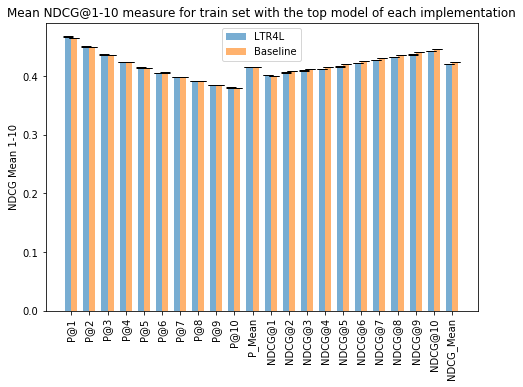

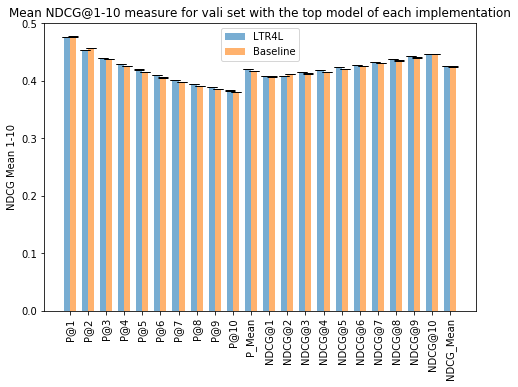

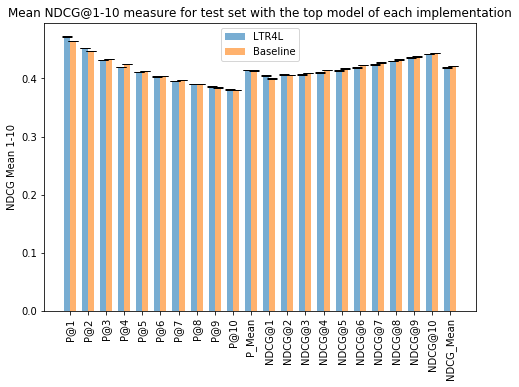

In [31]:
indices = range(len(measures_names))
width = np.min(np.diff(indices))/3.

for idx_dataset in range(len(datasets)):
    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(indices-width/2, ltr4l_mean[idx_dataset],width, yerr = ltr4l_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "LTR4L")
    ax.bar(indices+width/2, baseline_mean[idx_dataset],width, yerr = baseline_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "Baseline")
    ax.set_title("Mean NDCG@1-10 measure for "+datasets[idx_dataset]+" set with the top model of each implementation")
    ax.set_xticks(indices)
    ax.axes.set_xticklabels(measures_names)
    ax.set_ylabel("NDCG Mean 1-10")
    ax.legend(loc='best')

### Comparing NDCG of the top model of each library with Wilcoxon's signed-rank test

We will now compare the results by the two bests models of our libraries with the Wilcoxon's signed-rank test
- We take the best model of each library
- We study how they perform on each folder
- We will compare their NDCG values and use them for the Wilcoxon's signed-rank test

In [32]:
measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

w_score = [[] for x in range(len(datasets))]
p_value = [[] for x in range(len(datasets))]

sig_lvl = 0.05

In [33]:
n = len(folds)

for idx_dataset in range(len(datasets)):
    diff = [[] for x in range(len(measures_names))]
    
    baseline_path = "../../MQ2007/results_summary/Results_baseline_"+datasets[idx_dataset]+".csv"
    
    baseline_df = pd.read_csv(baseline_path)
    
    for idx_fold in range(len(folds)):
        
        ltr4l_path = "../../MQ2007/results_summary/Results_ltr4l_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        ltr4l_df = pd.read_csv(ltr4l_path)
        
        for idx_metric in range(len(measures_names)):
            ltr4l_NDCG = ltr4l_df.iloc[ltr4l_top_model_id][measures_names[idx_metric]]
            baseline_NDCG = baseline_df.iloc[idx_fold][measures_names[idx_metric]]
            diff[idx_metric].append(ltr4l_NDCG - baseline_NDCG)
            
    for idx_metric in range(len(measures_names)):        
        w,p= stats.wilcoxon(diff[idx_metric])
        w_score[idx_dataset].append(w)
        p_value[idx_dataset].append(p)

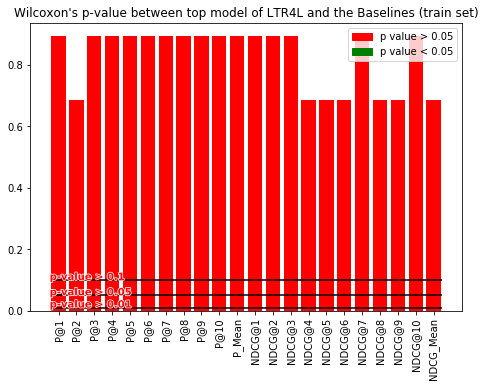

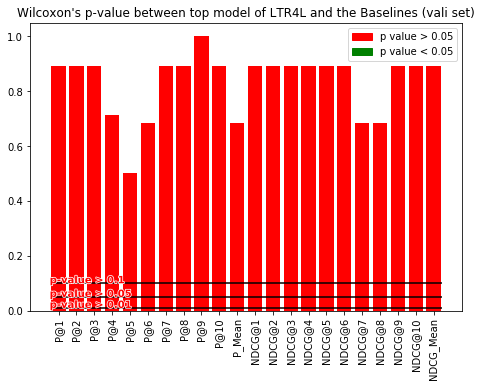

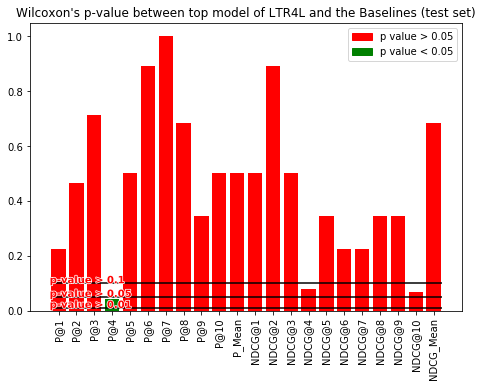

In [34]:
red_patch = mpatches.Patch(color='red', label='p value > '+str(sig_lvl))
green_patch = mpatches.Patch(color='green', label='p value < '+str(sig_lvl))
for idx_dataset in range(len(datasets)):
    colors = []
    for idx_metric in range(len(measures_names)):
        if p_value[idx_dataset][idx_metric] < sig_lvl:
            colors.append("green")
        else:
            colors.append("red")

    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(measures_names,p_value[idx_dataset],color=colors)
    ax.set_title("Wilcoxon's p-value between top model of LTR4L and the Baselines ("+datasets[idx_dataset]+" set)")
    ax.legend(handles=[red_patch,green_patch])
    if any(p > 0.1 for p in p_value[idx_dataset]):
        ax.hlines(0.1,-0.5,len(measures_names)-0.5, label="p_value > 0.1")
        txt = ax.text(-0.5, 0.1, s="p-value > 0.1", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.05 for p in p_value[idx_dataset]):
        ax.hlines(0.05,-0.5,len(measures_names)-0.5, label="p_value > 0.05")
        txt=ax.text(-0.5, 0.05, s="p-value > 0.05", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.01 for p in p_value[idx_dataset]):
        ax.hlines(0.01,-0.5,len(measures_names)-0.5, label="p_value > 0.01")
        txt=ax.text(-0.5, 0.01, s="p-value > 0.01", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])

In [35]:
w_score_df = pd.DataFrame(w_score, columns = measures_names, index=datasets)
w_score_df.style.set_caption("W score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,7,6,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,7,6,6,7,6
vali,7,7,7,4,5,6,7,7,5,7,6,7,7,7,7,7,7,6,6,7,7,7
test,3,3,4,0,5,7,5,6,4,5,5,5,7,5,1,4,3,3,4,4,0,6


In [36]:
p_value_df = pd.DataFrame(p_value, columns = measures_names, index=datasets)
p_value_df.style.set_caption("P-value score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0.892738,0.68583,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.68583,0.68583,0.68583,0.892738,0.68583,0.68583,0.892738,0.68583
vali,0.892738,0.892738,0.892738,0.715001,0.500184,0.68583,0.892738,0.892738,1,0.892738,0.68583,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.68583,0.68583,0.892738,0.892738,0.892738
test,0.224916,0.465209,0.712702,0.0431144,0.500184,0.892738,1,0.68583,0.345231,0.500184,0.500184,0.500184,0.892738,0.500184,0.0796158,0.345231,0.224916,0.224916,0.345231,0.345231,0.0678892,0.68583
